In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Definindo o número de registros
num_records = 1000

# Simulando dados
data = pd.DataFrame({
    'consumo_por_hora': np.random.normal(loc=5, scale=2, size=num_records),  # Consumo por hora (em kWh)
    'temp_diaria': np.random.normal(loc=25, scale=5, size=num_records),               # Temperatura média diária
    'humidade': np.random.normal(loc=60, scale=10, size=num_records),                # Umidade média
    'radiacao_solar': np.random.normal(loc=500, scale=100, size=num_records),       # Radiação solar (em W/m²)
    'num_residentes': np.random.randint(1, 6, size=num_records),                      # Número de habitantes na residência
    'evento': np.random.choice([0, 1], size=num_records, p=[0.8, 0.2])                # Evento especial (0: Não, 1: Sim)
})

# Visualizar as primeiras linhas dos dados simulados
print(data.head())


   consumo_por_hora  temp_diaria   humidade  radiacao_solar  num_residentes  \
0          3.202067    22.916245  54.772616      351.645595               3   
1          4.130203    20.941615  57.527198      570.549670               5   
2          8.103472    14.923959  57.046940      616.200503               5   
3          5.851832    25.969997  49.882802      532.035526               2   
4          5.317467    29.293782  57.006904      594.298063               4   

   evento  
0       0  
1       1  
2       0  
3       0  
4       0  


In [3]:
# Definindo X e y
X = data[['temp_diaria', 'humidade', 'radiacao_solar', 'num_residentes', 'evento']]
y = data['consumo_por_hora']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Modelo 1: Regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Modelo 2: Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


In [5]:
# Avaliação para Regressão Linear
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Regressão Linear - MAE: {mae_lr}, MSE: {mse_lr}")

# Avaliação para Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}")


Regressão Linear - MAE: 1.676578682667617, MSE: 4.3122663117773685
Random Forest - MAE: 1.7233872424393226, MSE: 4.650522397578911


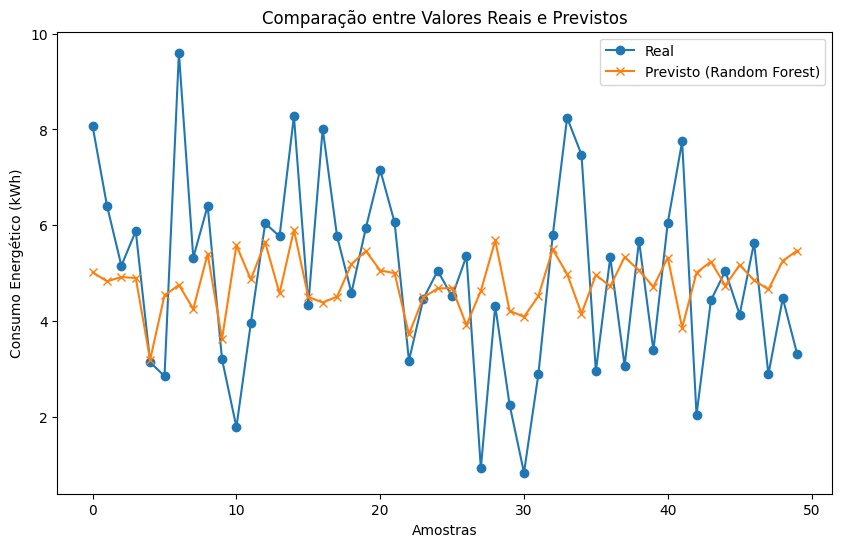

In [6]:
# Comparação entre real e previsto para o modelo Random Forest
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Real', marker='o')
plt.plot(y_pred_rf[:50], label='Previsto (Random Forest)', marker='x')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Consumo Energético (kWh)')
plt.title('Comparação entre Valores Reais e Previstos')
plt.show()


In [7]:
from sklearn.model_selection import RandomizedSearchCV

# Definindo o grid de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurando o RandomizedSearchCV para Random Forest
random_search = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf = random_search.best_estimator_
print("Melhores hiperparâmetros encontrados:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Melhores hiperparâmetros encontrados: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [8]:
# Previsão com o modelo otimizado
y_pred_best_rf = best_rf.predict(X_test)

# Avaliação do modelo otimizado
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
print(f"Random Forest Otimizado - MAE: {mae_best_rf}, MSE: {mse_best_rf}")


Random Forest Otimizado - MAE: 1.6943671597656171, MSE: 4.474870423173268


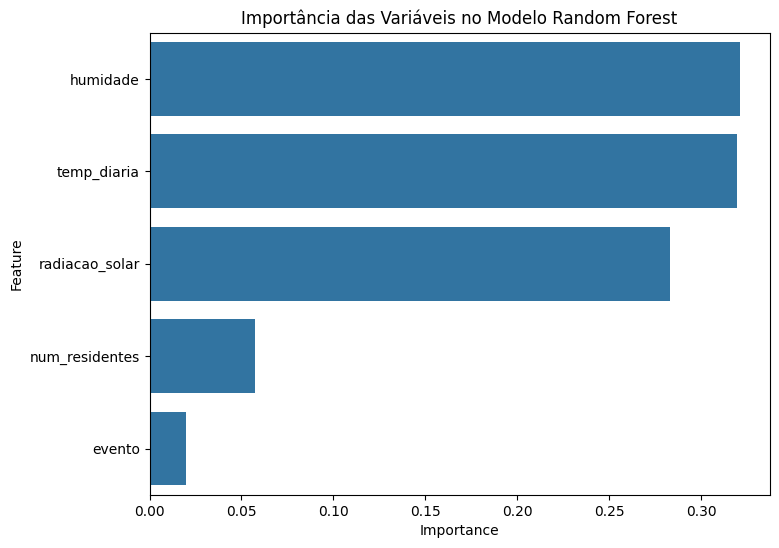

In [9]:
# Importância das variáveis
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualizar a importância das variáveis
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importância das Variáveis no Modelo Random Forest')
plt.show()


In [10]:
import joblib

# Salvando o modelo otimizado
joblib.dump(best_rf, 'modelo_consumo_energetico.pkl')
print("Modelo salvo com sucesso!")


Modelo salvo com sucesso!


In [11]:
# Definindo o novo número de registros para mais dados
num_records = 5000

# Simulando dados adicionais
data = pd.DataFrame({
    'consumo_por_hora': np.random.normal(loc=5, scale=2, size=num_records),    # Consumo por hora (em kWh)
    'temp_diaria': np.random.normal(loc=25, scale=5, size=num_records),                   # Temperatura média diária
    'humidade': np.random.normal(loc=60, scale=10, size=num_records),                    # Umidade média
    'radiacao_solar': np.random.normal(loc=500, scale=100, size=num_records),           # Radiação solar (em W/m²)
    'num_residentes': np.random.randint(1, 6, size=num_records),                          # Número de habitantes na residência
    'evento': np.random.choice([0, 1], size=num_records, p=[0.8, 0.2]),                   # Evento especial (0: Não, 1: Sim)
    'velocidade_vento': np.random.normal(loc=10, scale=3, size=num_records),                   # Velocidade do vento (m/s)
    'voltagem': np.random.normal(loc=220, scale=10, size=num_records),                    # Tensão da instalação (V)
    'corrente': np.random.normal(loc=10, scale=2, size=num_records),                      # Corrente da instalação (A)
    'hora_do_dia': np.random.choice(['manha', 'tarde', 'final da tarde', 'noite'], size=num_records)
})

# Convertendo a variável 'hora_do_dia' para variáveis dummy para uso no modelo
data = pd.get_dummies(data, columns=['hora_do_dia'])

# Visualizar as primeiras linhas dos dados simulados com novos atributos
print(data.head())


   consumo_por_hora  temp_diaria   humidade  radiacao_solar  num_residentes  \
0          4.846627    28.697546  60.829434      531.909013               4   
1          4.085210    25.129279  59.614955      529.172252               3   
2          3.646551    25.377475  67.993772      488.914707               1   
3          7.225511    28.488764  52.929251      474.672645               5   
4         -1.720966    36.198877  60.424937      508.711364               5   

   evento  velocidade_vento    voltagem   corrente  \
0       1         10.059532  230.003787   9.101044   
1       0         13.785432  198.985820  12.844182   
2       0          8.136719  215.435699  11.956255   
3       0         13.665025  209.167325   9.504349   
4       0         10.304782  207.808455   9.077706   

   hora_do_dia_final da tarde  hora_do_dia_manha  hora_do_dia_noite  \
0                       False              False               True   
1                        True              False          

In [12]:
# Dividindo os dados em variáveis independentes (X) e variável alvo (y)
X = data.drop(columns=['consumo_por_hora'])
y = data['consumo_por_hora']

# Dividindo o conjunto em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo com Random Forest com os novos dados
best_rf.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = best_rf.predict(X_test)

# Avaliação do modelo com dados adicionais
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest com Dados Adicionais - MAE: {mae_rf}, MSE: {mse_rf}")


Random Forest com Dados Adicionais - MAE: 1.5586781432390047, MSE: 3.7476517237898794


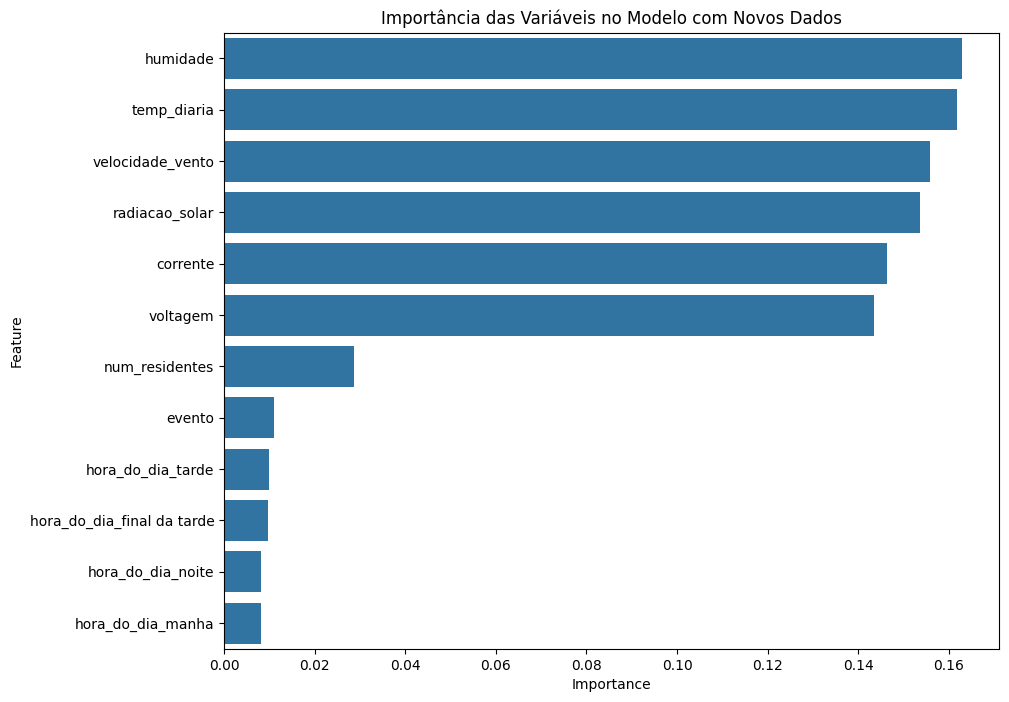

In [13]:
# Importância das variáveis com os novos dados
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualizando a importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importância das Variáveis no Modelo com Novos Dados')
plt.show()
